In [476]:
import pandas as pd
import seaborn as sns

In [477]:
pata.csv')

In [478]:
truck_dataframe

,Unnamed: 0,timestamp,type,total,truck_id
0,0,2023-07-21 09:17:00,card,7.0,1
1,1,2023-07-21 09:25:00,card,7.0,1
2,2,2023-07-21 09:49:00,card,7.0,1
3,3,2023-07-21 10:09:00,card,9.6,1
4,4,2023-07-21 10:23:00,card,10.1,1
...,...,...,...,...,...
6744,6744,2023-07-27 17:51:00,cash,5.0,5
6745,6745,2023-07-27 18:08:00,cash,5.0,5
6746,6746,2023-07-27 18:26:00,cash,5.0,5
6747,6747,2023-07-27 18:38:00,cash,5.0,5


### Transaction numbers for each truck_id

In [479]:
truck_dataframe.groupby(['truck_id']).count()

,Unnamed: 0,timestamp,type,total
truck_id,,,,
1,1202,1202,1202,1202
2,1435,1435,1435,1435
3,1777,1777,1777,1777
4,301,301,301,301
5,1244,1244,1244,1244
6,790,790,790,790


### Truck with the lowest total transaction value

In [480]:
truck_dataframe.groupby(['total']).min().head(1)

,Unnamed: 0,timestamp,type,truck_id
total,,,,
0.99,5205,2023-07-21 09:29:00,card,4


### Average transaction value

In [481]:
truck_dataframe['total'].mean()

6.526540228181952

### Average transaction value for each truck

In [482]:
average = (truck_dataframe.groupby('truck_id')['total'].mean())
average

truck_id
1    7.802329
2    8.042787
3    6.094108
4    3.016578
5    5.430466
6    5.867215
Name: total, dtype: float64

### Proportion of transactions use cash

In [483]:
cash = truck_dataframe.query("type == 'cash'")['type'].count()
card = truck_dataframe.query("type == 'card'")['type'].count()

proportion_of_cash = cash / (cash+card) * 100
print(proportion_of_cash)

51.48910949770337


### Bar chart showing average transaction total for trucks

<Axes: xlabel='truck_id', ylabel='total'>

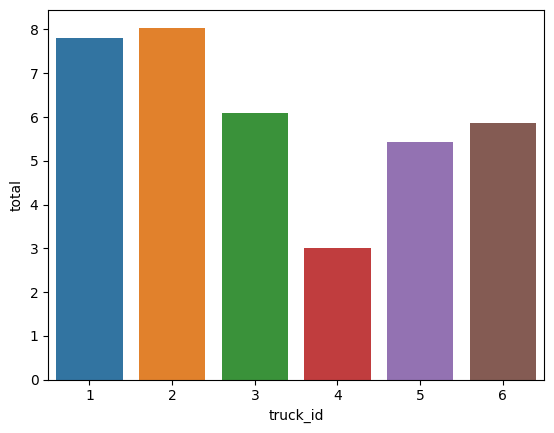

In [484]:
average_table = average.reset_index()
sns.barplot(data=average_table, x='truck_id', y='total')

### A pie chart showing the proportion of transactions made using cash or card

<Axes: title={'center': 'Proportion of cash and card'}, ylabel='count'>

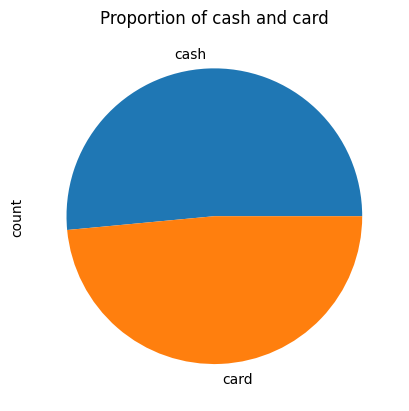

In [485]:
truck_dataframe['type'].value_counts().plot(kind='pie', title="Proportion of cash and card")

### A line chart showing the total transaction value each day

In [486]:
truck_dataframe['timestamp'] = pd.to_datetime(truck_dataframe['timestamp'])


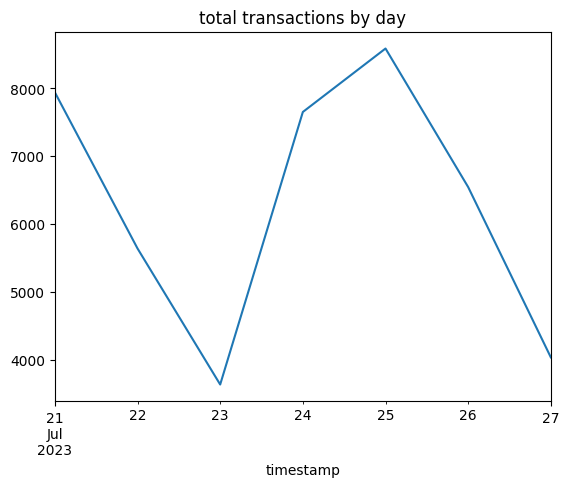

In [487]:
totals = truck_dataframe.set_index('timestamp').resample('D').sum()['total']
line_chart = totals.plot.line(title="total transactions by day")